In [51]:
import random
import os


# Function to generate a random graph
def generate_data(NODES_NUMBER):
    data = []
    used_coordinates = set()

    while len(data) < NODES_NUMBER:
        x = random.randint(0, 1000)
        y = random.randint(0, 1000)
        if (x, y) not in used_coordinates:
            used_coordinates.add((x, y))
            data.append((len(data) + 1, x, y))

    return data


# Function to write the generated data to a file
def write_to_file(filename, data):
    with open(filename, "w") as f:
        for entry in data:
            f.write(f"{entry[0]} {entry[1]} {entry[2]}\n")


NODES_NUMBER = 100
data = generate_data(NODES_NUMBER)


filename = "TSP.txt"
if os.path.exists(filename):
    os.remove(filename)

write_to_file(filename, data)

print(f"Data generated and written to {filename}")

Data generated and written to TSP.txt


10 36096.170437287066
20 29887.492375080445
30 26130.339641167222
40 23190.983917740257
50 21939.949039852192
60 20424.632454038183
70 19684.42701742755
80 18996.31181469069
90 18321.252648493646
100 17818.443628159377
110 17297.592340080668
120 16665.883098688122
130 16417.022523107575
140 16032.571378845512
150 15572.08388949519
160 15163.775457852393
170 14920.153534789162
180 14771.989368544784
190 14584.162994396707
200 13925.158367629394
210 13669.397675074928
220 13433.721528848095
230 13301.073832973194
240 13155.32626597823
250 12972.1793119828
260 12928.00115894025
270 12811.415997552818
280 11996.411151378137
290 11793.901350929122
300 11641.328317233278
310 11550.498182197933
320 11530.11830647074
330 11495.80549940949
340 11489.277213333828
350 11488.307779010192
360 11487.56686614319
370 11487.56686614319
380 11487.56686614319
390 11487.56686614319
400 11487.56686614319

----------------------------------------------------------------
Generation: 400
Fittest chromosome di

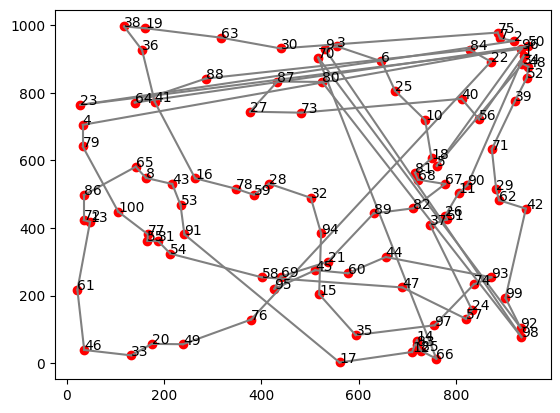

In [52]:
import random
import math
import matplotlib.pyplot as plt


# Function to get cities information from a file
def get_city():
    cities = []
    # Open the file containing city information
    f = open("TSP.txt")
    for i in f.readlines():
        node_city_val = i.split()
        # Append city information to the list
        cities.append(
            [node_city_val[0], float(node_city_val[1]), float(node_city_val[2])]
        )

    return cities


# Function to calculate the total distance of the path
def calculate_distance(cities):
    total_sum = 0
    for i in range(len(cities) - 1):
        cityA = cities[i]
        cityB = cities[i + 1]

        # Calculate the Euclidean distance between two cities
        d = math.sqrt(
            math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2)
        )

        total_sum += d

    # Calculate the distance between the last and the first city to complete the loop
    cityA = cities[0]
    cityB = cities[-1]
    d = math.sqrt(math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2))

    total_sum += d

    return total_sum


# Function to create the initial population
def select_population(cities, size):
    population = []

    for i in range(size):
        c = cities.copy()
        # Shuffle cities to create a random path
        random.shuffle(c)
        distance = calculate_distance(c)
        # Append the path and its distance to the population
        population.append([distance, c])
    fitest = sorted(population)[0]

    return population, fitest


# Function to perform the genetic algorithm
def genetic_algorithm(
    population,
    lenCities,
    GENERATIONS_NUMBER,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
):
    gen_number = 0
    for i in range(GENERATIONS_NUMBER):
        new_population = []

        # Selecting the two best options (elitism)
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])

        for i in range(int((len(population) - 2) / 2)):
            # Perform crossover based on the crossover rate
            random_number = random.random()
            if random_number < CROSSOVER_RATE:
                parent_chromosome1 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]
                parent_chromosome2 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]

                point = random.randint(0, lenCities - 1)

                # Create child chromosomes by combining parts of parent chromosomes
                child_chromosome1 = parent_chromosome1[1][0:point]
                for j in parent_chromosome2[1]:
                    if (j in child_chromosome1) == False:
                        child_chromosome1.append(j)

                child_chromosome2 = parent_chromosome2[1][0:point]
                for j in parent_chromosome1[1]:
                    if (j in child_chromosome2) == False:
                        child_chromosome2.append(j)

            # If crossover does not happen
            else:
                child_chromosome1 = random.choices(population)[0][1]
                child_chromosome2 = random.choices(population)[0][1]

            # Perform mutation based on the mutation rate
            if random.random() < MUTATION_RATE:
                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome1[point1], child_chromosome1[point2] = (
                    child_chromosome1[point2],
                    child_chromosome1[point1],
                )

                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome2[point1], child_chromosome2[point2] = (
                    child_chromosome2[point2],
                    child_chromosome2[point1],
                )

            # Add new children to the population
            new_population.append(
                [calculate_distance(child_chromosome1), child_chromosome1]
            )
            new_population.append(
                [calculate_distance(child_chromosome2), child_chromosome2]
            )

        population = new_population

        gen_number += 1

        # Print the best distance every 10 generations
        if gen_number % 10 == 0:
            print(gen_number, sorted(population)[0][0])

    answer = sorted(population)[0]

    return answer


# Function to draw the cities and the best path found
def drawMap(city, answer):
    for j in city:
        # Plot each city
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))

    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            second = answer[1][i + 1]
            # Draw the path between cities
            plt.plot([first[1], second[1]], [first[2], second[2]], "gray")
        except:
            continue

    # Draw the path back to the start to complete the loop
    first = answer[1][0]
    second = answer[1][-1]
    plt.plot([first[1], second[1]], [first[2], second[2]], "gray")

    plt.show()


def main():
    GENERATIONS_NUMBER = 200
    POPULATION_SIZE = 3000
    TOURNAMENT_SELECTION_SIZE = 7
    MUTATION_RATE = 0.2
    CROSSOVER_RATE = 0.85

    cities = get_city()
    # Select the initial population and the fittest individual
    firstPopulation, firstFitest = select_population(cities, POPULATION_SIZE)
    answer = genetic_algorithm(
        firstPopulation,
        len(cities),
        GENERATIONS_NUMBER,
        TOURNAMENT_SELECTION_SIZE,
        MUTATION_RATE,
        CROSSOVER_RATE,
    )

    print("\n----------------------------------------------------------------")
    print("Initial generation performance : " + str(firstFitest[0]))
    print("Best generation result : " + str(answer[0]))
    print("----------------------------------------------------------------\n")

    drawMap(cities, answer)


main()